-- Task 2 begins --

In [33]:
#import numpy, matplotlib and interpolate from scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [34]:
# intialize empty array
task_2_txt = np.loadtxt("task_II_data.txt",dtype=float,delimiter=",")

In [35]:
# go through each line and element and delete that line if any of its elements is nan
x = len(task_2_txt)
i = 0

while( i < x ):
    for j in range( 0 , len(task_2_txt[i]) ):
        if(np.isnan(task_2_txt[i][j])):
            task_2_txt = np.delete( task_2_txt , (i) , 0) # if np.isnan(test[i][j])==True, delete row
            x = len(task_2_txt) # update upper bound of while loop when one line is deleted
            i = i - 1 # to check the new ith row again after deleting
            break # break the inner for-loop when nan is found
    i = i + 1

In [36]:
for i in range ( 0 , 4 ):
    print("Column "+str(i)+": ")
    print("   Mean: "+str(np.mean(task_2_txt , axis = 0)[i]))
    print("   Standard deviation: "+str(np.std(task_2_txt , axis = 0)[i])+"\n")

Column 0: 
   Mean: 4.999967107011116e-12
   Standard deviation: 0.9999999999931781

Column 1: 
   Mean: 1.0000084094130557e-11
   Standard deviation: 0.9999999999988219

Column 2: 
   Mean: 1.0000003949905966e-11
   Standard deviation: 1.0000000000058604

Column 3: 
   Mean: 1.0000017480749079e-11
   Standard deviation: 1.0000000000033717



In [37]:
print("Row 3 before edit:")
print(task_2_txt[2,:])
task_2_txt[2] = [1,1,1,1]
print("\nRow 3 after edit:")
print(task_2_txt[2,:])

Row 3 before edit:
[-0.20682088  1.34891973  1.87906991  1.28061368]

Row 3 after edit:
[1. 1. 1. 1.]


In [38]:
# prints tha rownumbers of those rows where the 2nd element is over 0.5
print("The 2nd element of the following rows are larger than 0.5: ")
testarray = np.array(np.where(task_2_txt>0.5), dtype = int)

for i in range( 0 , len(np.where(task_2_txt>0.5)[1])):
    if ( testarray[1][i] == 1 ):
        print("\n"+str(testarray[0][i]))
        print(task_2_txt[testarray[0][i], :])

The 2nd element of the following rows are larger than 0.5: 

0
[ 1.44009018  1.31579679 -1.20351222 -0.64975055]

1
[ 1.45845961  1.12070275 -2.08544131  0.60239487]

2
[1. 1. 1. 1.]

4
[-0.05758539  1.35928316 -0.90377374  0.17181682]

5
[-1.05001347  1.42387013  0.57918597  0.59410267]

14
[-0.39320627  1.12419476  1.94996322  1.33808555]

16
[-0.79640397  0.65937073  0.36039459  1.33246741]


-- Task 3 begins --

In [39]:
# read the .txt document to a variable
task_3_txt = np.loadtxt("task_III_data.txt",dtype=float,delimiter=",")

In [40]:
# transpose the array and assign the columns from earlier to variables
z = np.transpose(task_3_txt)[0]
y = np.transpose(task_3_txt)[1]

# define interpolation functions
f = interp1d(z, y)
f2 = interp1d(z, y, kind='cubic')

# define new values for z (200 values between 0 and 40)
z2 = np.linspace(0,40, num=200)

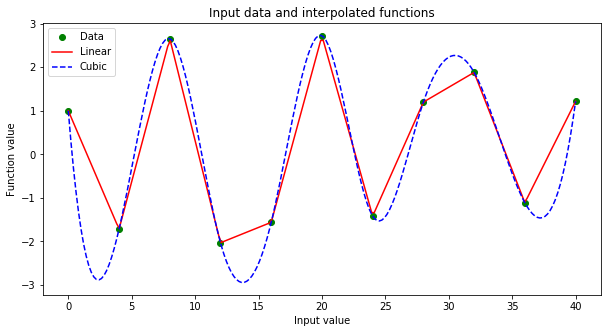

In [32]:
# plot the original data and interpolated curves

# size of figure
plt.figure(figsize=(10,5))

# plot the three different datasets and define markers/linetypes and colours
plt.plot( z , y , "go" , label = "Data");
plt.plot( z2 , f(z2) , "r-" , label = "Linear");
plt.plot( z2 , f2(z2) , "b--", label = "Cubic" );

# add titles and labels
plt.title("Input data and interpolated functions")
plt.xlabel("Input value")
plt.ylabel("Function value")
plt.legend(loc='upper left')

# show the plot
plt.show()